<a href="https://colab.research.google.com/github/SatriyaPratama/Bengkel-Koding/blob/main/Bengkod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UAS
Muhammad Satriya Pratama M.K.
(A11.2022.14225)

# Persiapan

In [1]:
# Mount Google Drive
# Langkah ini bertujuan untuk menghubungkan Google Colab dengan Google Drive
# sehingga kita bisa membaca file yang ada di Drive (misalnya, "adult.csv").
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Exploratory Data Analysis (EDA)

In [3]:
#Load Dataset
file_path = '/content/drive/MyDrive/Colab Notebooks/BengKod/ObesityDataSet.csv'

df = pd.read_csv(file_path)

# Tampilkan beberapa baris dataset
print("=== 5 Baris Pertama Dataset ===")
df.head(5)

=== 5 Baris Pertama Dataset ===


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,Female,1.62,64,no,no,2,3,no,no,2,yes,0,1,Sometimes,Public_Transportation,Normal_Weight
1,21,Female,1.52,56,Sometimes,no,3,3,yes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,23,Male,1.8,77,Frequently,no,2,3,no,no,2,yes,2,1,Sometimes,Public_Transportation,Normal_Weight
3,27,Male,1.8,87,Frequently,no,3,3,no,no,2,no,2,0,Sometimes,Walking,Overweight_Level_I
4,22,Male,1.78,89.8,Sometimes,no,2,1,no,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
#Informasi umum dataset
print("\n=== Informasi Dataset ===")
df.info()


=== Informasi Dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  FAF                  

In [5]:
# Deskripsi statistik untuk fitur numerik
print("\n=== Descriptive Statistics (Numerik) ===")
df.describe()


=== Descriptive Statistics (Numerik) ===


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
count,2097,2102,2099,2100,2106,2100,2103,2099,2101,2106,2105,2098,2103,2102,2100,2105,2111
unique,1394,3,1562,1518,5,3,808,637,3,3,1263,3,1186,1130,5,6,7
top,18,Male,1.7,80,Sometimes,yes,3,3,no,no,2,yes,0,0,Sometimes,Public_Transportation,Obesity_Type_I
freq,124,1056,58,58,1386,1844,647,1183,1997,2054,441,1705,404,552,1747,1572,351


In [6]:
# Descriptive statistics untuk fitur kategorikal
print("\n=== Descriptive Statistics (Kategorikal) ===")
df.describe(include=['object', 'category'])


=== Descriptive Statistics (Kategorikal) ===


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
count,2097,2102,2099,2100,2106,2100,2103,2099,2101,2106,2105,2098,2103,2102,2100,2105,2111
unique,1394,3,1562,1518,5,3,808,637,3,3,1263,3,1186,1130,5,6,7
top,18,Male,1.7,80,Sometimes,yes,3,3,no,no,2,yes,0,0,Sometimes,Public_Transportation,Obesity_Type_I
freq,124,1056,58,58,1386,1844,647,1183,1997,2054,441,1705,404,552,1747,1572,351


In [7]:
# Cek missing values per kolom
print("\n=== Missing Values per Kolom ===")
print(df.isnull().sum())


=== Missing Values per Kolom ===
Age                               14
Gender                             9
Height                            12
Weight                            11
CALC                               5
FAVC                              11
FCVC                               8
NCP                               12
SCC                               10
SMOKE                              5
CH2O                               6
family_history_with_overweight    13
FAF                                8
TUE                                9
CAEC                              11
MTRANS                             6
NObeyesdad                         0
dtype: int64


In [8]:
# Cek jumlah nilai unik per kolom
print("\n=== Jumlah Nilai Unik per Kolom ===")
print(df.nunique())



=== Jumlah Nilai Unik per Kolom ===
Age                               1394
Gender                               3
Height                            1562
Weight                            1518
CALC                                 5
FAVC                                 3
FCVC                               808
NCP                                637
SCC                                  3
SMOKE                                3
CH2O                              1263
family_history_with_overweight       3
FAF                               1186
TUE                               1130
CAEC                                 5
MTRANS                               6
NObeyesdad                           7
dtype: int64


In [9]:
# Cek data duplikat
num_duplicates = df.duplicated().sum()
print(f"\nJumlah Baris Duplikat: {num_duplicates}")



Jumlah Baris Duplikat: 18


In [10]:
# Cek keseimbangan target
print("\n=== Distribusi Kelas Target (NObeyesdad) ===")
print(df['NObeyesdad'].value_counts())


=== Distribusi Kelas Target (NObeyesdad) ===
NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64


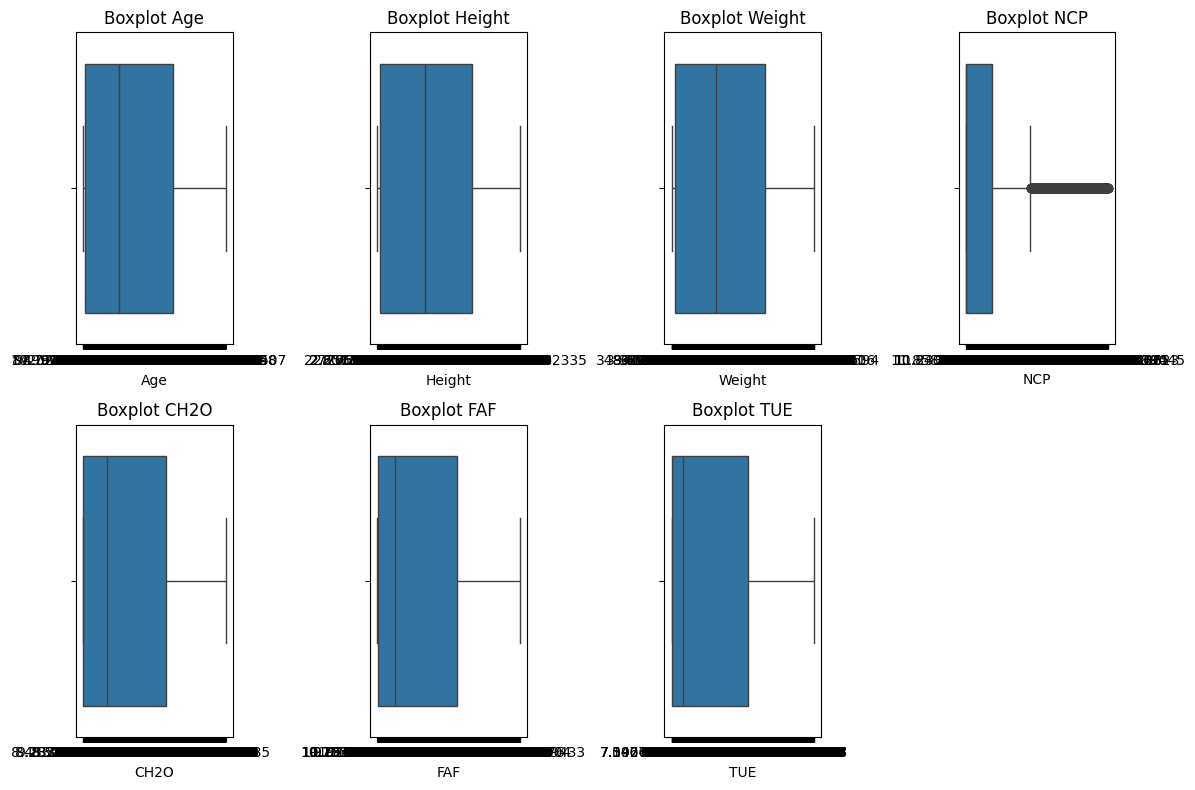

In [11]:
# Boxplot untuk variabel kontinu
kontinu_cols = ['Age', 'Height', 'Weight', 'NCP', 'CH2O', 'FAF', 'TUE']
valid_continuous = [col for col in kontinu_cols if col in df.columns]
plt.figure(figsize=(12, 8))
for i, col in enumerate(valid_continuous, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(data=df, x=col, orient='h')
    plt.title(f'Boxplot {col}')
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

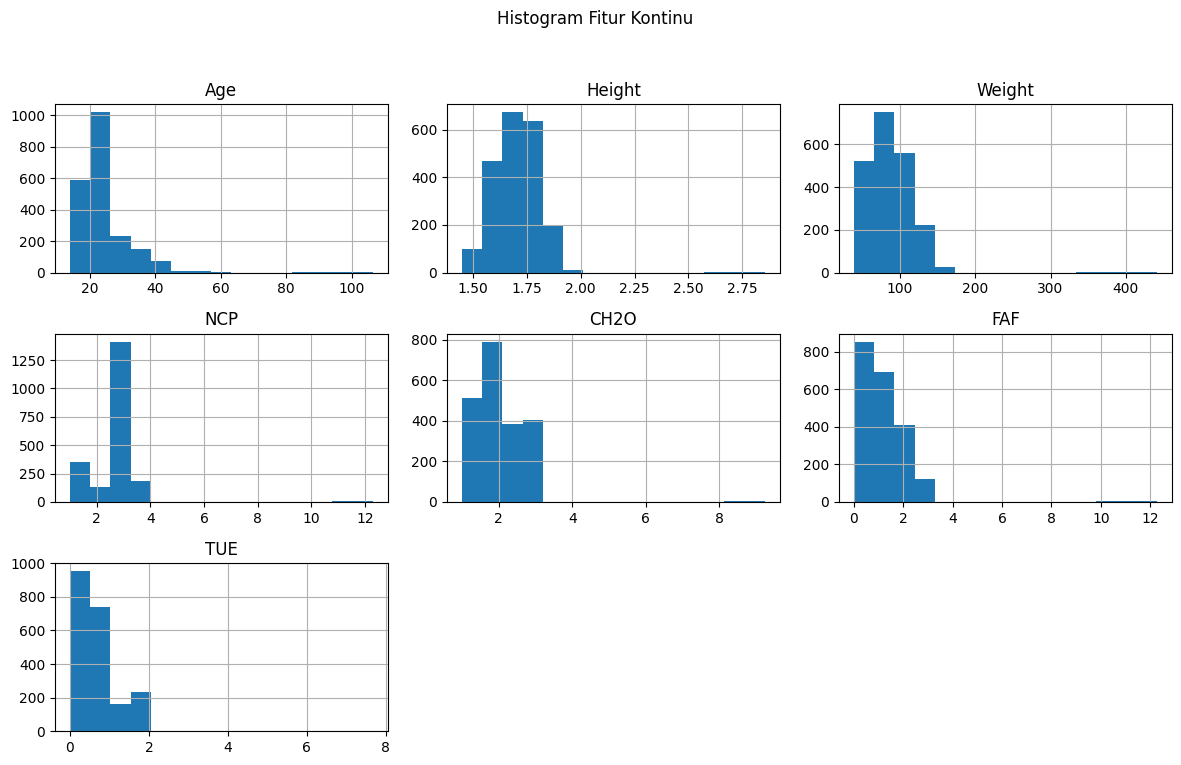

In [12]:
valid_cols = [col for col in kontinu_cols if col in df.columns]
for col in valid_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

plt.figure(figsize=(12, 8))
if valid_cols:
    df[valid_cols].hist(bins=15, figsize=(12, 8))
    plt.suptitle('Histogram Fitur Kontinu')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


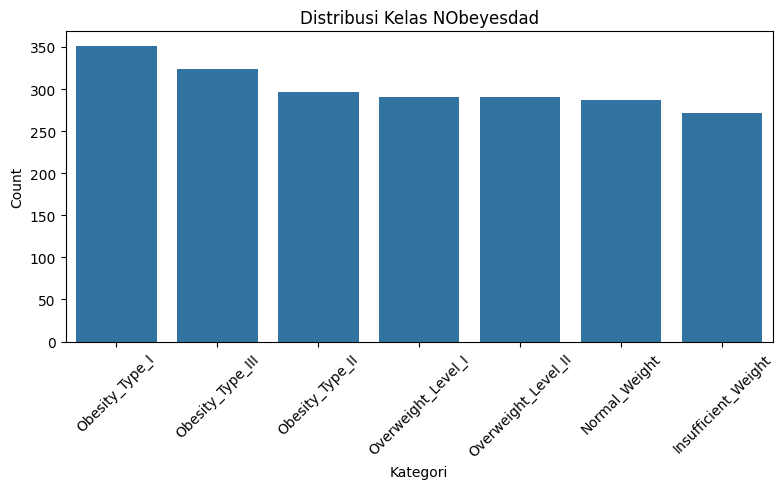

In [13]:
# Countplot untuk target
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='NObeyesdad', order=df['NObeyesdad'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Distribusi Kelas NObeyesdad')
plt.ylabel('Count')
plt.xlabel('Kategori')
plt.tight_layout()
plt.show()

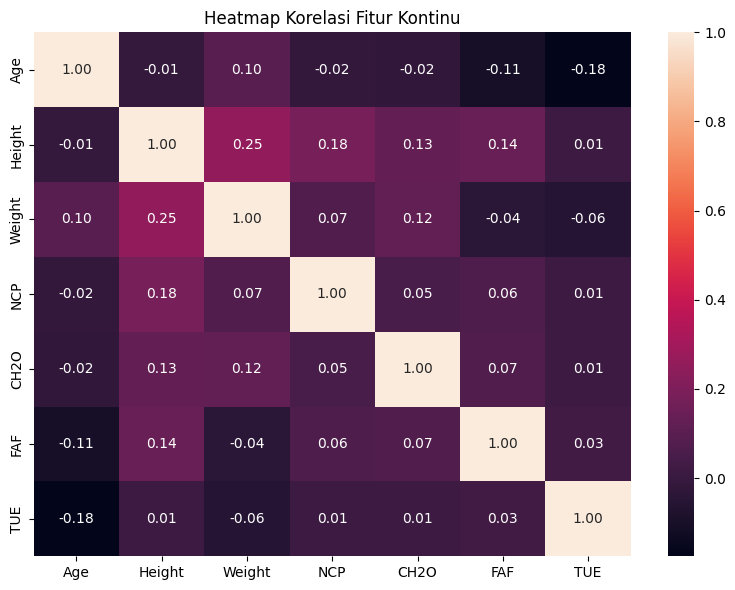

In [14]:
# Heatmap korelasi fitur kontinu
plt.figure(figsize=(8, 6))
if valid_cols:
    corr_matrix = df[valid_cols].corr()
    sns.heatmap(corr_matrix, annot=True, fmt=".2f")
    plt.title('Heatmap Korelasi Fitur Kontinu')
    plt.tight_layout()
    plt.show()


# Preprocessing

In [17]:
# Pisahkan fitur (X) dan target (y)
target_col = 'NObeyesdad'
X = df.drop(columns=[target_col])
y = df[target_col].copy()
print(f"Shapes – X: {X.shape}, y: {y.shape}")

Shapes – X: (2111, 16), y: (2111,)


In [18]:
# Identifikasi kolom numerik dan kategorikal
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

# # Menangani missing value(numerik: median, kategorikal:modus)
imputer_num = SimpleImputer(strategy='median')
imputer_cat = SimpleImputer(strategy='most_frequent')
X[numerical_cols] = imputer_num.fit_transform(X[numerical_cols])
X[cat_cols] = imputer_cat.fit_transform(X[cat_cols])

In [19]:
# One-hot encode kolom kategorikal
X = pd.get_dummies(X, columns=cat_cols, drop_first=True)
print(f"After encoding, X shape: {X.shape}")

After encoding, X shape: (2111, 837)


In [20]:
# Standardisasi fitur numerik
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])
display(X.head())


,Age,Height,Weight,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,CALC_Always,...,family_history_with_overweight_yes,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,-0.443006,-0.739524,-0.682408,0.274304,-0.041274,-0.937799,0.448247,True,False,False,...,True,False,False,True,False,False,False,False,True,False
1,-0.443006,-1.593802,-0.904711,0.274304,1.318996,1.684745,-0.951428,True,False,False,...,True,False,False,True,False,False,False,False,True,False
2,-0.203420,0.798176,-0.321165,0.274304,-0.041274,0.810564,0.448247,False,True,False,...,True,False,False,True,False,False,False,False,True,False
3,0.275753,0.798176,-0.043285,0.274304,-0.041274,0.810564,-0.951428,False,True,False,...,False,False,False,True,False,False,False,False,False,True
4,-0.323213,0.627321,0.034521,-1.774560,-0.041274,-0.937799,-0.951428,False,True,False,...,False,False,False,True,False,False,False,False,True,False


In [22]:
df_clean = pd.concat([X, y.reset_index(drop=True)], axis=1)
df_clean.to_csv('/content/drive/MyDrive/Colab Notebooks/BengKod/ObesityDataSet_clean_combined.csv', index=False)